# 0.数据预处理

## 0.1导入库和数据

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文

In [168]:
feature_train=pd.read_excel('D:\my_dateset\Molecular_Descriptor.xlsx',index_col='SMILES',sheet_name='training')
label_train=pd.read_excel('D:\my_dateset\ERα_activity.xlsx',index_col='SMILES',sheet_name='training')

In [169]:
#删除无关列，以pIC50作为标签列
del label_train["IC50_nM"]

In [170]:
#基本数据类型展示
feature_train.info()
#显示无空值

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4 to COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@H]3C[C@H]4O[C@@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1
Columns: 729 entries, nAcid to Zagreb
dtypes: float64(359), int64(370)
memory usage: 11.0+ MB


In [171]:
#plt.figure(figsize=(20,10),dpi=400)
#feature_train.iloc[:,40:60].boxplot()

In [172]:
#生成数据集
data=pd.concat((feature_train,label_train),axis=1)
data.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174,8.130768


In [173]:
#feature_train.columns

In [174]:
#查看变量统计值
print('n10Ring',data['n10Ring'].nunique())
print('nAcid',data['nAcid'].nunique())
print('ALogP',data['ALogP'].nunique())
print('nAtom',data['nAtom'].nunique())
print('WTPT-2',data['WTPT-2'].nunique())
print('MW',data['MW'].nunique())

n10Ring 1
nAcid 5
ALogP 1625
nAtom 87
WTPT-2 1470
MW 1319


In [175]:
#data.describe().to_excel('D:\my_dateset\describe.xlsx')

## 0.2查看数据分布情况

In [176]:
'''
fig,axes=plt.subplots(6,6)
columns=['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond','nAtom', 'nHeavyAtom', 'nH','MW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH', 'WPOL','XLogP', 'Zagreb']
for i in range (6):
    for j in range (6):
        axes[i,j].hist(x=columns[i+j],data=data,edgecolor='#000000',linewidth=2)
        axes[i,j].set_title(columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()
'''

"\nfig,axes=plt.subplots(6,6)\ncolumns=['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond','nAtom', 'nHeavyAtom', 'nH','MW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH', 'WPOL','XLogP', 'Zagreb']\nfor i in range (6):\n    for j in range (6):\n        axes[i,j].hist(x=columns[i+j],data=data,edgecolor='#000000',linewidth=2)\n        axes[i,j].set_title(columns[i+j])\nfig=plt.gcf()\nfig.set_size_inches(18,18)\nfig.tight_layout()\n"

In [177]:
'''
for i in data.columns[:6]:
    fig = plt.figure()
    fig.suptitle(i)
    plt.hist(data[i])
'''

'\nfor i in data.columns[:6]:\n    fig = plt.figure()\n    fig.suptitle(i)\n    plt.hist(data[i])\n'

In [178]:
#查看数据分布情况
#sns.distplot(data['pIC50'])
#sns.distplot(data['nAcid'])

In [179]:
#查看变量统计值
'''
print(data['n10Ring'].value_counts())
print(data['nAcid'].value_counts())
print(data['ALogP'].value_counts())
print(data['nAtom'].value_counts())
print(data['WTPT-2'].value_counts())
print(data['MW'].value_counts())
'''

"\nprint(data['n10Ring'].value_counts())\nprint(data['nAcid'].value_counts())\nprint(data['ALogP'].value_counts())\nprint(data['nAtom'].value_counts())\nprint(data['WTPT-2'].value_counts())\nprint(data['MW'].value_counts())\n"

In [180]:
#统计变量不同数据值的数量
#data['n10Ring'].nunique()

## 0.3剔除无关变量

In [181]:
#删除数据只有一种的特征即无关变量
for s in feature_train.columns:
    if feature_train[s].nunique()==1:
        del feature_train[s]  

In [202]:
#生成新的剔除无关变量的数据集
data=pd.concat((feature_train,label_train),axis=1)
data.head()
data.to_excel('D:\\my_dateset\\data_pre.xlsx')
#生成504个变量

## 0.4剔除冗余变量

In [183]:
#利用spearman系数计算变量见的相关性
#abs取绝对值
corrlation=abs(data.corr(method='spearman'))
corrlation['pIC50'].sort_values()
corrlation


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
nAcid,1.000000,0.298464,0.294498,0.127125,0.087442,0.148992,0.128085,0.071150,0.142736,0.011872,...,0.130279,0.190618,0.097911,0.099315,0.081729,0.123396,0.149544,0.072792,0.138795,0.089022
ALogP,0.298464,1.000000,0.839721,0.154591,0.044144,0.352324,0.365084,0.000730,0.060073,0.060433,...,0.053615,0.039049,0.173593,0.232812,0.144005,0.043113,0.063338,0.325502,0.060326,0.227602
ALogp2,0.294498,0.839721,1.000000,0.206210,0.131773,0.258400,0.267773,0.095173,0.142974,0.044380,...,0.134108,0.121343,0.111207,0.177669,0.106748,0.129674,0.138409,0.341661,0.135492,0.174244
AMR,0.127125,0.154591,0.206210,1.000000,0.961691,0.661600,0.589020,0.926123,0.970967,0.804414,...,0.971228,0.326233,0.455455,0.353602,0.304766,0.967399,0.892645,0.448692,0.951214,0.454511
apol,0.087442,0.044144,0.131773,0.961691,1.000000,0.504649,0.425076,0.990971,0.959475,0.921645,...,0.959164,0.318972,0.372514,0.314274,0.272351,0.952547,0.906731,0.510868,0.942748,0.440487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPATH,0.123396,0.043113,0.129674,0.967399,0.952547,0.600290,0.525283,0.925527,0.992083,0.790220,...,0.988957,0.275921,0.557568,0.434226,0.337279,1.000000,0.894391,0.390364,0.963631,0.388602
WPOL,0.149544,0.063338,0.138409,0.892645,0.906731,0.494950,0.424504,0.889545,0.933442,0.775660,...,0.935278,0.379534,0.431551,0.400694,0.221481,0.894391,1.000000,0.403700,0.963937,0.405490
XLogP,0.072792,0.325502,0.341661,0.448692,0.510868,0.245372,0.222946,0.523117,0.407307,0.573974,...,0.405263,0.120929,0.262242,0.213624,0.129881,0.390364,0.403700,1.000000,0.391971,0.395658
Zagreb,0.138795,0.060326,0.135492,0.951214,0.942748,0.594482,0.519984,0.915270,0.984461,0.779988,...,0.988556,0.401631,0.520059,0.423114,0.310909,0.963631,0.963937,0.391971,1.000000,0.404740


Text(0.5, 1.0, '(a) 504维')

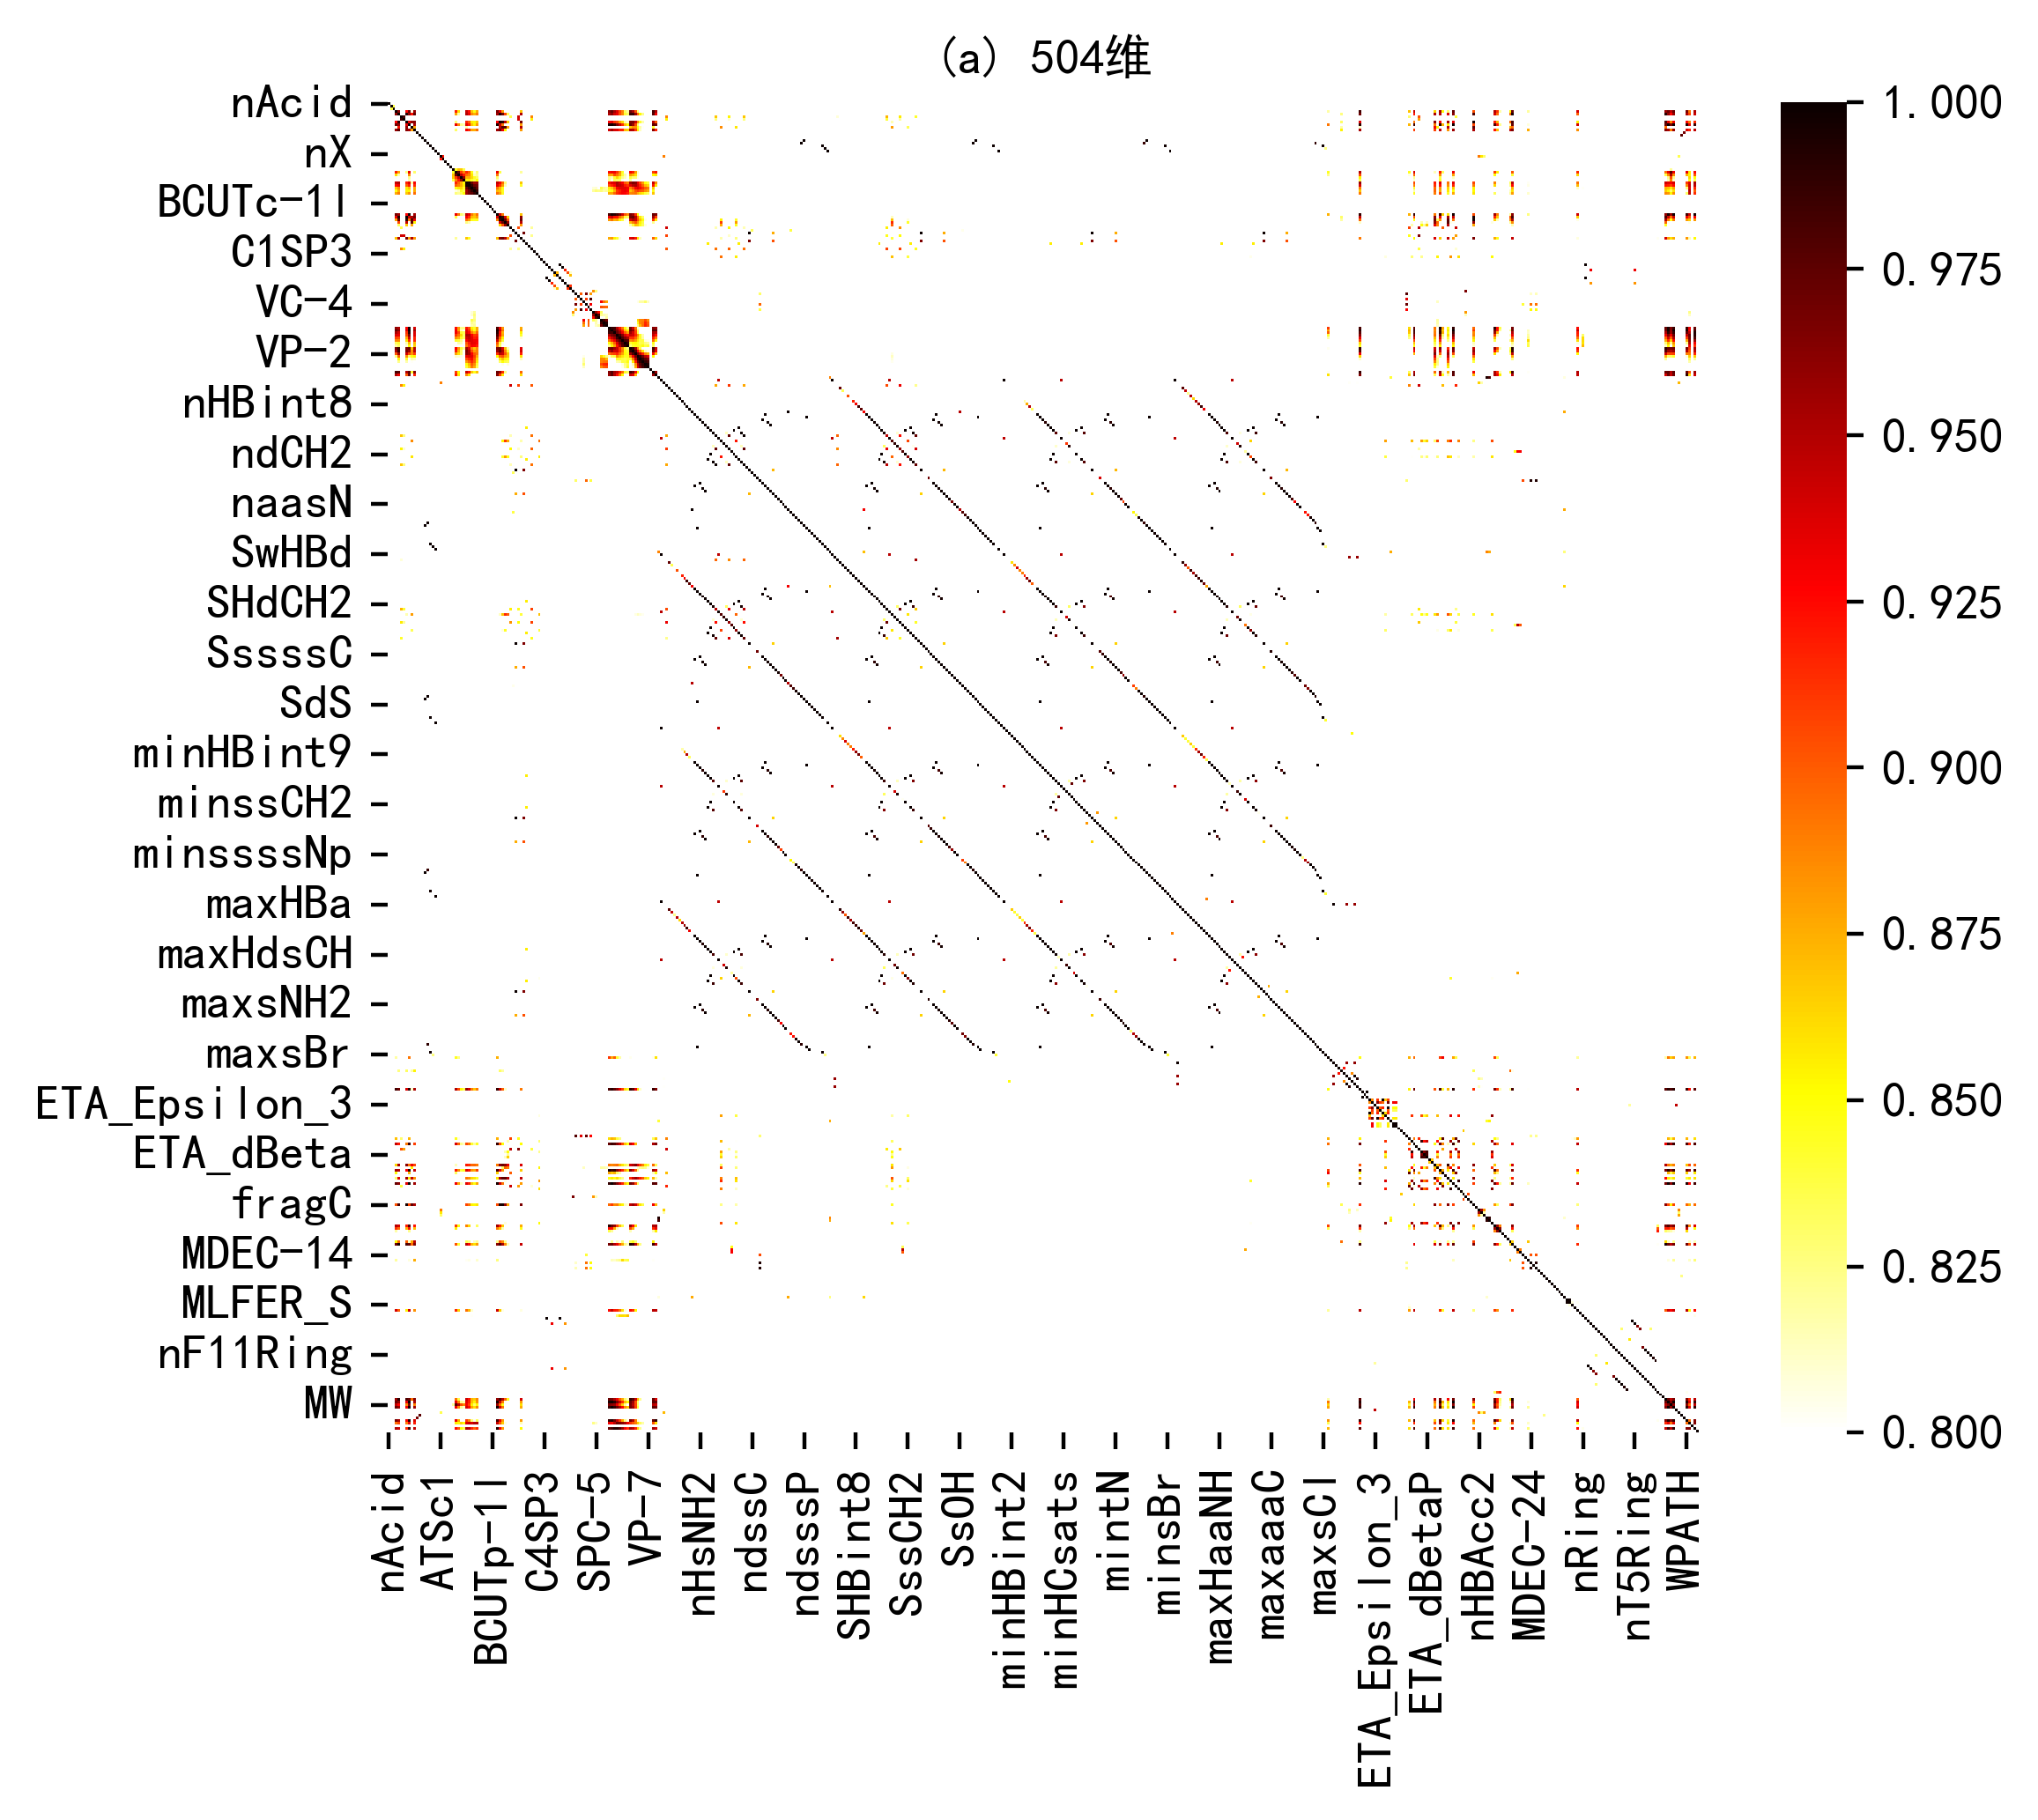

In [184]:
#剔除前热力图
plt.figure(figsize=(6,5),dpi=400)
sns.heatmap(corrlation,vmin=0.8,vmax=1,cmap='hot_r')
plt.title("(a) 504维",fontsize=10)

In [185]:
#构建DF格式
cor_1=pd.DataFrame(corrlation['pIC50'])
cor_1['rank']=range(0,505)
cor_1.columns=['pIC50','rank']
cor_1=cor_1.drop("pIC50",axis=0)
cor_1

,pIC50,rank
nAcid,0.089022,0
ALogP,0.227602,1
ALogp2,0.174244,2
AMR,0.454511,3
apol,0.440487,4
...,...,...
WTPT-5,0.148885,499
WPATH,0.388602,500
WPOL,0.405490,501
XLogP,0.395658,502


In [186]:
feature_1=[]
for i in range(504):
    feature_1.append(feature_train.columns[cor_1.iloc[i,1]])

len(feature_1)

504

In [200]:
#删除相关性大于0.5的冗余特征
for i in range(len(feature_1)):
    for j in range(len(feature_1)):
        if i!=j:
            if corrlation.iloc[i,j]>=0.9 and corrlation.index[i] in feature_1 and corrlation.columns[j] in feature_1:  
                #行和列特征都在才能完成遍历
                feature_1.remove(corrlation.columns[j])

In [199]:
feature_1
feature_train1=feature_train[feature_1]
feature_train1.shape
#生成剔除冗余变量的446个变量数据集

(1974, 261)

In [189]:
data=pd.concat((feature_train,label_train),axis=1)
data=pd.concat((data[feature_1],label_train),axis=1)
data

,nAcid,ALogP,ALogp2,AMR,naAromAtom,nH,nS,nP,nF,nCl,...,nRotB,LipinskiFailures,TopoPSA,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPOL,XLogP,pIC50
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.2860,0.081796,126.1188,12,33,1,0,0,0,...,6,0,67.23,2.089409,15.471445,8.858910,3.406628,47,4.666,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.8620,0.743044,131.9420,12,37,1,0,0,0,...,6,1,67.23,2.089698,15.486947,8.863774,3.406648,54,5.804,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,0.7296,0.532316,139.9304,18,29,1,0,0,0,...,6,0,87.46,2.083301,18.011114,11.390412,3.406644,52,2.964,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,-0.3184,0.101379,133.4822,12,37,1,0,0,0,...,7,1,67.23,2.087385,15.468365,8.857943,3.406624,50,6.015,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1.3551,1.836296,143.1903,18,31,1,0,0,0,...,7,0,67.23,2.087385,15.468365,8.857943,3.406624,50,4.462,8.130768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,0,1.8193,3.309852,177.6817,24,30,1,0,0,0,...,9,0,119.90,2.063023,25.470481,21.946991,0.000000,70,2.526,6.131944
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,0,1.6903,2.857114,167.6057,24,26,1,0,0,0,...,7,0,141.90,2.064929,24.928962,21.405589,0.000000,66,1.884,5.850781
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,0,1.6903,2.857114,167.6057,24,26,1,0,0,0,...,7,0,141.90,2.064894,24.923083,21.400883,0.000000,66,1.884,7.721246


In [190]:
corrlation2=abs(data.corr(method='spearman'))
corrlation2['pIC50'].sort_values()
corrlation2

,nAcid,ALogP,ALogp2,AMR,naAromAtom,nH,nS,nP,nF,nCl,...,nRotB,LipinskiFailures,TopoPSA,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPOL,XLogP,pIC50
nAcid,1.000000,0.298464,0.294498,0.127125,0.148992,0.011872,0.037261,0.010509,0.210908,0.029723,...,0.122626,0.033664,0.157312,0.190618,0.097911,0.099315,0.081729,0.149544,0.072792,0.089022
ALogP,0.298464,1.000000,0.839721,0.154591,0.352324,0.060433,0.019400,0.027273,0.252563,0.110184,...,0.036532,0.117683,0.278512,0.039049,0.173593,0.232812,0.144005,0.063338,0.325502,0.227602
ALogp2,0.294498,0.839721,1.000000,0.206210,0.258400,0.044380,0.007280,0.025456,0.213725,0.080598,...,0.072750,0.064132,0.198845,0.121343,0.111207,0.177669,0.106748,0.138409,0.341661,0.174244
AMR,0.127125,0.154591,0.206210,1.000000,0.661600,0.804414,0.260511,0.005253,0.040495,0.068280,...,0.755009,0.283238,0.217925,0.326233,0.455455,0.353602,0.304766,0.892645,0.448692,0.454511
naAromAtom,0.148992,0.352324,0.258400,0.661600,1.000000,0.257262,0.155835,0.029471,0.087503,0.015163,...,0.381504,0.014440,0.174480,0.403892,0.327960,0.229526,0.218260,0.494950,0.245372,0.357205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTPT-4,0.099315,0.232812,0.177669,0.353602,0.229526,0.163083,0.204821,0.048342,0.081818,0.129916,...,0.317266,0.031274,0.601793,0.017993,0.528988,1.000000,0.169968,0.400694,0.213624,0.091640
WTPT-5,0.081729,0.144005,0.106748,0.304766,0.218260,0.194506,0.176032,0.018812,0.040403,0.046919,...,0.339076,0.051980,0.249485,0.193800,0.537170,0.169968,1.000000,0.221481,0.129881,0.148885
WPOL,0.149544,0.063338,0.138409,0.892645,0.494950,0.775660,0.111053,0.036590,0.072012,0.093250,...,0.564186,0.224864,0.185854,0.379534,0.431551,0.400694,0.221481,1.000000,0.403700,0.405490
XLogP,0.072792,0.325502,0.341661,0.448692,0.245372,0.573974,0.139843,0.045324,0.073905,0.025645,...,0.348679,0.410659,0.428509,0.120929,0.262242,0.213624,0.129881,0.403700,1.000000,0.395658


Text(0.5, 1.0, '（B）83维')

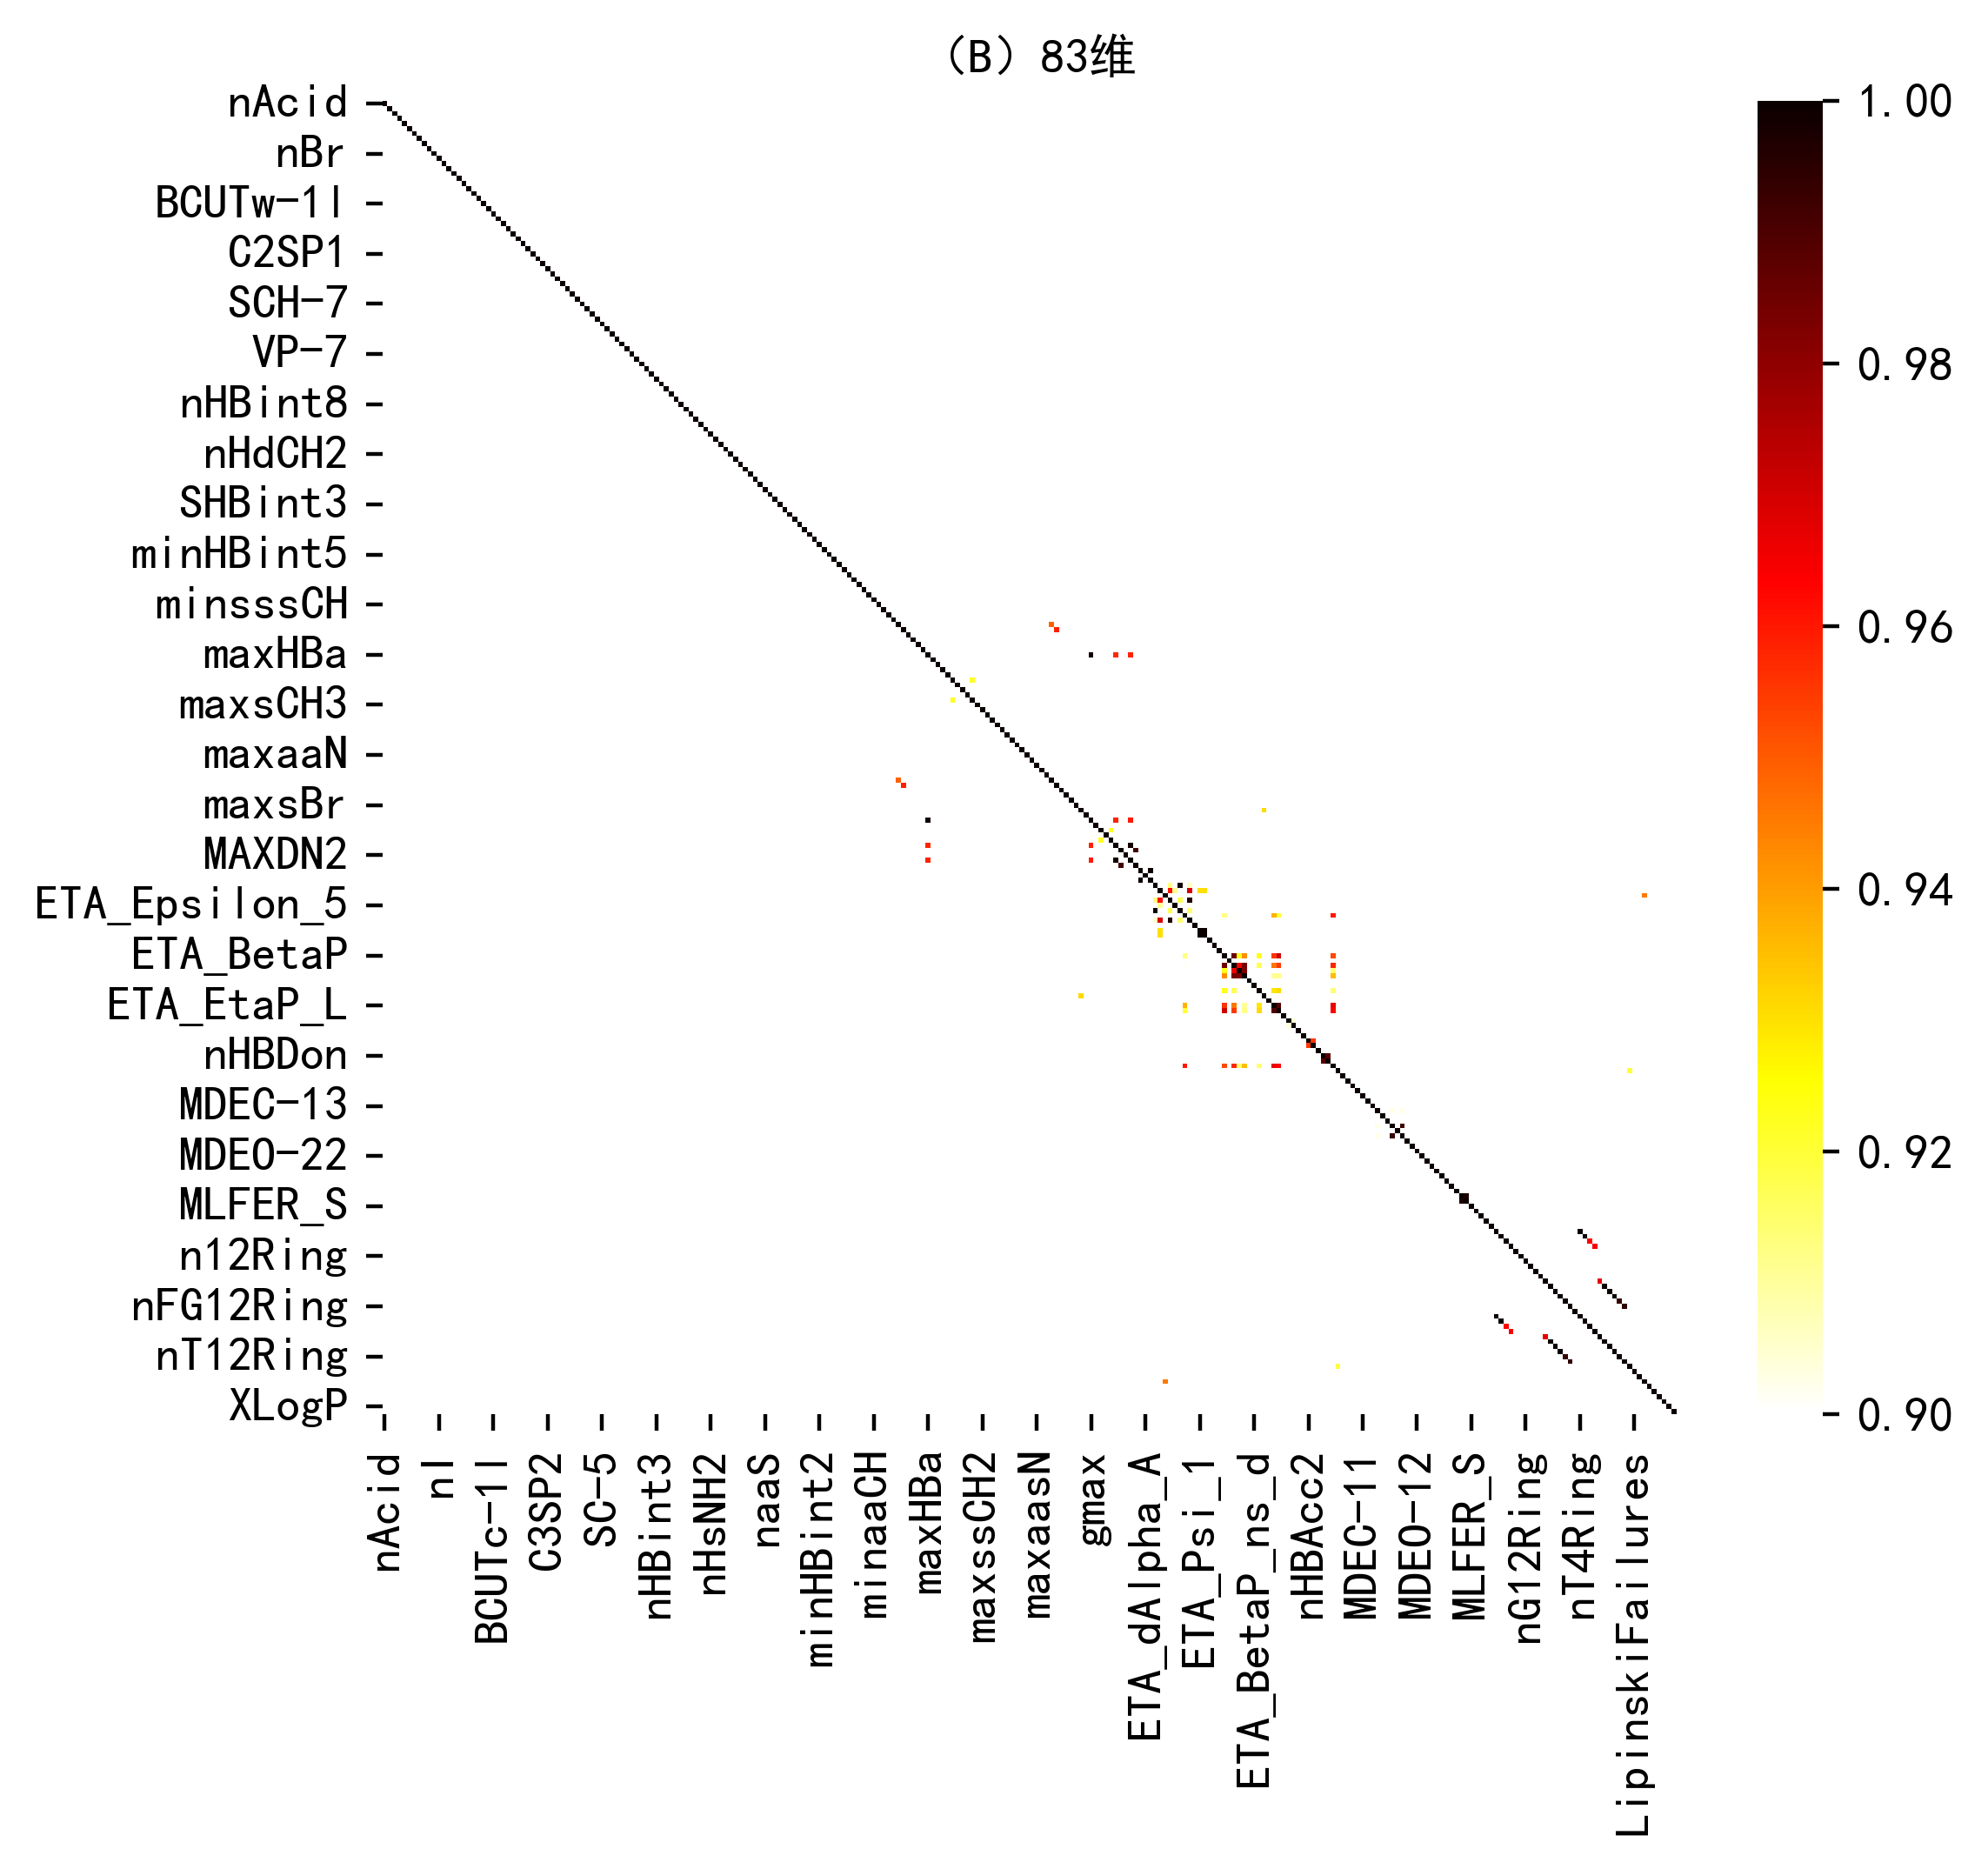

In [191]:
#剔除后热力图
plt.figure(figsize=(6,5),dpi=400)
sns.heatmap(corrlation2,vmin=0.9,vmax=1,cmap='hot_r')
plt.title("（B）83维",fontsize=10)

In [192]:
#再次检验是否还有满足相关性大于0.5的变量
a=0
for i in range(67):
    for j in range(67):
        if i!=j:
            if corrlation2.iloc[i,j]>0 and corrlation2.index[i] in feature_1 and corrlation2.columns[j] in feature_1:
                a=a+1
a

4422

## 0.5生成新数据集

In [193]:
data.to_excel('D:\\my_dateset\\data_pre.xlsx')